In [1]:
import numpy as np 

from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, make_scorer, f1_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import shap
import os 
import sys
if sys.platform == 'darwin':
    print("Current system is macOS")
    main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
elif sys.platform == 'linux':
    print("Current system is Ubuntu")
    main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
else:
    print("Current system is neither macOS nor Ubuntu")
    
sys.path.append(main_fold_path)    
os.chdir(main_fold_path)
from utils.hyperopt_utils import get_best_hyperparameters, get_best_hyperparameters_skf_inside_loocv_monitoring_recall_bacc
from utils.fnirs_utils import print_md_table_val_test_AUC
from scripts.explanation.explanation_utils import show_ranked_shap_channel_importance
from LOO_nested_CV_model import build_model


model_name = 'gnn_transformer'
config_file_name = 'pretreatment_response_cv_5_mix_hb'
msg = 'loocv_v4to13'
TrainModel = build_model(model_name, config_file_name, msg)


Current system is Ubuntu


2024-04-19 14:34:45.413191: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-19 14:34:45.432447: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:7704] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-19 14:34:45.432468: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-19 14:34:45.432475: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1520] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-19 14:34:45.436594: I tensorflow/core/platform/cpu_feature_g

fold_path is not founded yet results/gnn_transformer/prognosis_mix_hb/pretreatment_response/loocv_v4to13l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/LOO_0/stratified_nested_5_CV_fold-0
results/gnn_transformer/prognosis_mix_hb/pretreatment_response/loocv_v4to13l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/LOO_0/stratified_nested_5_CV_fold-0/val_acc.txt will be set to 0 because it has not been trained yet
fold_path is not founded yet results/gnn_transformer/prognosis_mix_hb/pretreatment_response/loocv_v4to13l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/LOO_0/stratified_nested_5_CV_fold-1
results/gnn_transformer/prognosis_mix_hb/pretreatment_response/loocv_v4to13l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/LOO_0/stratified_nested_5_CV_fold-1/val_acc.txt will be set to 0 because it has not been trained yet
fold_path is not founded yet results/gnn_transformer/prognos

2024-04-19 14:34:46.062327: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-19 14:34:46.062408: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-04-19 14:34:46.063632: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 52, 2500, 1)]        0         []                            
                                                                                                  
 tf.__operators__.getitem (  (None, 52, 2500)             0         ['input_3[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 input_1 (InputLayer)        [(None, 52, 52)]             0         []                            
                                                                                                  
 tf.__operators__.getitem_1  (None, 52, 2500)             0         ['input_3[0][0]']         

In [2]:
from utils.utils_mine import stratified_LOO_nested_CV

data = TrainModel.data
label = TrainModel.label
adj = TrainModel.adj
current_loo = 0
k = 0
num_of_k_fold = 5
classifier = TrainModel.model
X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test = stratified_LOO_nested_CV(data, label, k=k, num_of_k_fold=num_of_k_fold, current_loo=current_loo, adj=adj)

print(f'X_train: {X_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'X_test: {X_test.shape}')

X_train: (52, 52, 2500)
X_val: (11, 52, 2500)
X_test: (1, 52, 2500)


In [3]:
def permutation_importance(model, X_val_test, y, adj_test, num_iterations=10):
    # Store the baseline model performance
    baseline_performance = accuracy_score(y, model.predict([X_val_test, adj_test]).argmax(axis=1))
    
    # Initialize the importance dictionary
    importances = {}

    # Iterate over all features
    for i in range(X_val_test.shape[1]):
        feature_performance = []
        
        # Repeat the permutation process multiple times
        for _ in range(num_iterations):
            X_permuted = X_val_test.copy()
            # Shuffle one feature (channel)
            shuffle_indices = np.arange(X_val_test.shape[0]) 
            X_permuted[:, i, :] = X_val_test[shuffle_indices, i, :]
            
            # Measure performance with the shuffled data
            permuted_performance = accuracy_score(y, model.predict([X_permuted, adj_test]).argmax(axis=1))
            print('baseline_performance:', baseline_performance)
            print('permuted_performance:', permuted_performance)
            feature_performance.append(baseline_performance - permuted_performance)
        
        # Calculate the average drop in performance
        importances[i] = np.mean(feature_performance)
    
    return list(importances.values())

def retain_importance(model, X_val_test, y, adj_test, num_iterations=1):
    # Store the baseline model performance
    baseline_performance = accuracy_score(y, model.predict([X_val_test, adj_test]).argmax(axis=1))
    
    # Initialize the importance dictionary
    importances = {}

    # Iterate over all features
    for i in range(X_val_test.shape[1]):
        feature_performance = []
        
        # Repeat the permutation process multiple times
        for _ in range(num_iterations):
            X_permuted = np.zeros_like(X_val_test)
            # Shuffle one feature (channel)
            X_permuted[:, i, :] = X_val_test[:, i, :]
            
            # Measure performance with the shuffled data
            permuted_performance = accuracy_score(y, model.predict([X_permuted, adj_test], verbose=False).argmax(axis=1))

            feature_performance.append(baseline_performance - permuted_performance)
        
        # Calculate the average drop in performance
        importances[i] = np.mean(feature_performance)
    
    return list(importances.values())

def retain_importance_ch_42_31_11_21(model, X_val_test, y, adj_test, num_iterations=10):
    channel_list = [41, 30, 10, 20]
    # Store the baseline model performance
    baseline_performance = accuracy_score(y, model.predict([X_val_test, adj_test]).argmax(axis=1))
    
    # Initialize the importance dictionary
    importances = {}

    # Iterate over all features
    for i in channel_list: #range(X_val_test.shape[1]):
        feature_performance = []
        
        # Repeat the permutation process multiple times
        for _ in range(num_iterations):
            X_permuted = np.zeros_like(X_val_test)
            # Shuffle one feature (channel)
            X_permuted[:, i, :] = X_val_test[:, i, :]
            
            # Measure performance with the shuffled data
            permuted_performance = accuracy_score(y, model.predict([X_permuted, adj_test], verbose=False).argmax(axis=1))
            print('channel:', i+1)
            print('baseline_performance:', baseline_performance)
            print('permuted_performance:', permuted_performance)
            
            
            feature_performance.append(baseline_performance - permuted_performance)

        # Calculate the average drop in performance
        importances[i] = np.mean(feature_performance)
    
    return list(importances.values())

In [5]:
from sklearn.metrics import accuracy_score
k_fold_all_importance = []

all_subjects_shap = []

def model_predict(model, X):
    return model.predict(X).argmax(axis=1)  # Modify according to your model's output

for v_itr in range(4,14):
    for k_fold in range(0, 5):
        all_importance = []
        for subject in range(64):
            print('Current subject -> ', subject)
            X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test = stratified_LOO_nested_CV(data, label, k=k_fold, num_of_k_fold=num_of_k_fold, current_loo=subject, adj=adj)
            X_train = X_train[..., np.newaxis]
            
            X_val_test = np.concatenate([X_val, X_test], axis=0)[..., np.newaxis]
            Y_val_test = np.concatenate([Y_val, Y_test], axis=0).argmax(axis=1)
            adj_val_test = np.concatenate([adj_val, adj_test], axis=0)
            
            
            checkpoint_path = f'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/loocv_v{v_itr}l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/LOO_{subject}/stratified_nested_5_CV_fold-{k_fold}/fold-best-checkpoint'
            classifier.model.load_weights(checkpoint_path)
            model = classifier.model

            # importance = permutation_importance(model, X_val_test, Y_val_test, adj_val_test, num_iterations=2)
            importance = retain_importance(model, X_val_test, Y_val_test, adj_val_test, num_iterations=1)
            all_importance.append(importance)

        np_all_importance = np.array(all_importance)

        k_fold_all_importance.append(np_all_importance)
np_k_fold_all_importance = np.array(k_fold_all_importance)

np.save(f'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/ten_itr_retain_single_ch_performance.npy', np_k_fold_all_importance)


Current subject ->  0
1/1 [==============================] - 0s 15ms/step
Current subject ->  1
1/1 [==============================] - 0s 14ms/step
Current subject ->  2
1/1 [==============================] - 0s 14ms/step
Current subject ->  3
1/1 [==============================] - 0s 14ms/step
Current subject ->  4
1/1 [==============================] - 0s 13ms/step
Current subject ->  5
1/1 [==============================] - 0s 14ms/step
Current subject ->  6
1/1 [==============================] - 0s 14ms/step
Current subject ->  7
1/1 [==============================] - 0s 14ms/step
Current subject ->  8
1/1 [==============================] - 0s 14ms/step
Current subject ->  9
1/1 [==============================] - 0s 14ms/step
Current subject ->  10
1/1 [==============================] - 0s 14ms/step
Current subject ->  11
1/1 [==============================] - 0s 13ms/step
Current subject ->  12
1/1 [==============================] - 0s 14ms/step


KeyboardInterrupt: 

: 

In [9]:
np_k_fold_all_importance = np.array(k_fold_all_importance)

print(np_k_fold_all_importance.shape)

(5, 64, 52)


In [26]:
np_k_fold_all_importance

array([[[0.66666667, 0.66666667, 0.66666667, ..., 0.66666667,
         0.66666667, 0.58333333],
        [0.75      , 0.83333333, 0.75      , ..., 0.75      ,
         0.75      , 0.66666667],
        [0.66666667, 0.75      , 0.66666667, ..., 0.66666667,
         0.66666667, 0.58333333],
        ...,
        [0.75      , 0.83333333, 0.75      , ..., 0.75      ,
         0.75      , 0.66666667],
        [0.75      , 0.75      , 0.75      , ..., 0.75      ,
         0.75      , 0.75      ],
        [0.75      , 0.83333333, 0.75      , ..., 0.75      ,
         0.75      , 0.66666667]],

       [[0.66666667, 0.66666667, 0.66666667, ..., 0.66666667,
         0.66666667, 0.58333333],
        [0.75      , 0.75      , 0.66666667, ..., 0.75      ,
         0.75      , 0.66666667],
        [0.75      , 0.75      , 0.75      , ..., 0.75      ,
         0.75      , 0.75      ],
        ...,
        [0.75      , 0.75      , 0.75      , ..., 0.75      ,
         0.75      , 0.75      ],
        [0.7

In [12]:
mean_result  = np.mean(np_k_fold_all_importance, axis=(0,1))

In [13]:
mean_result.shape

(52,)

In [38]:
from scripts.explanation.explanation_utils import show_ranked_shap_channel_importance


In [39]:
channel = np.array([mean_result, mean_result])

channel = 1 - channel 
# channel = channel / np.max(channel)

# plt.bar(np.arange(52), channel[0])
# %matplotlib inline
show_ranked_shap_channel_importance(channel, y_label_name = 'h')

TypeError: show_ranked_shap_channel_importance() got an unexpected keyword argument 'y_label_name'

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

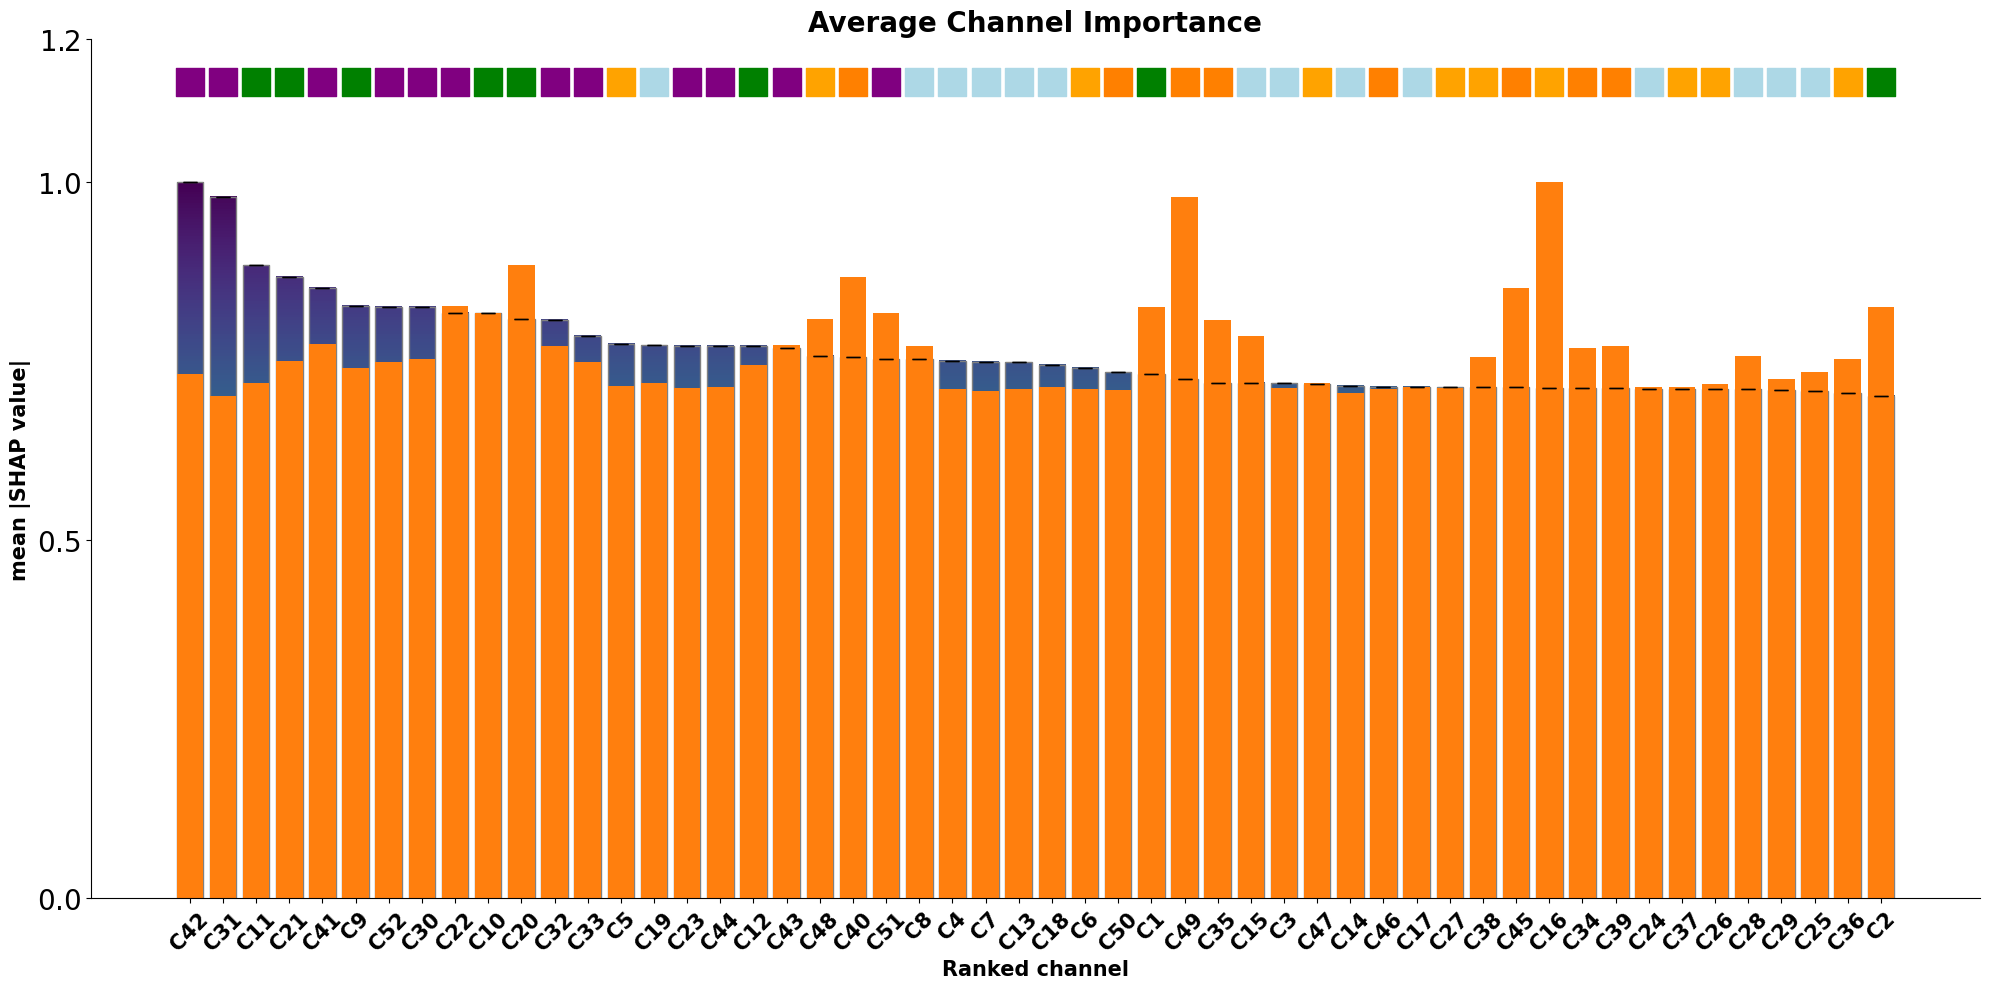

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

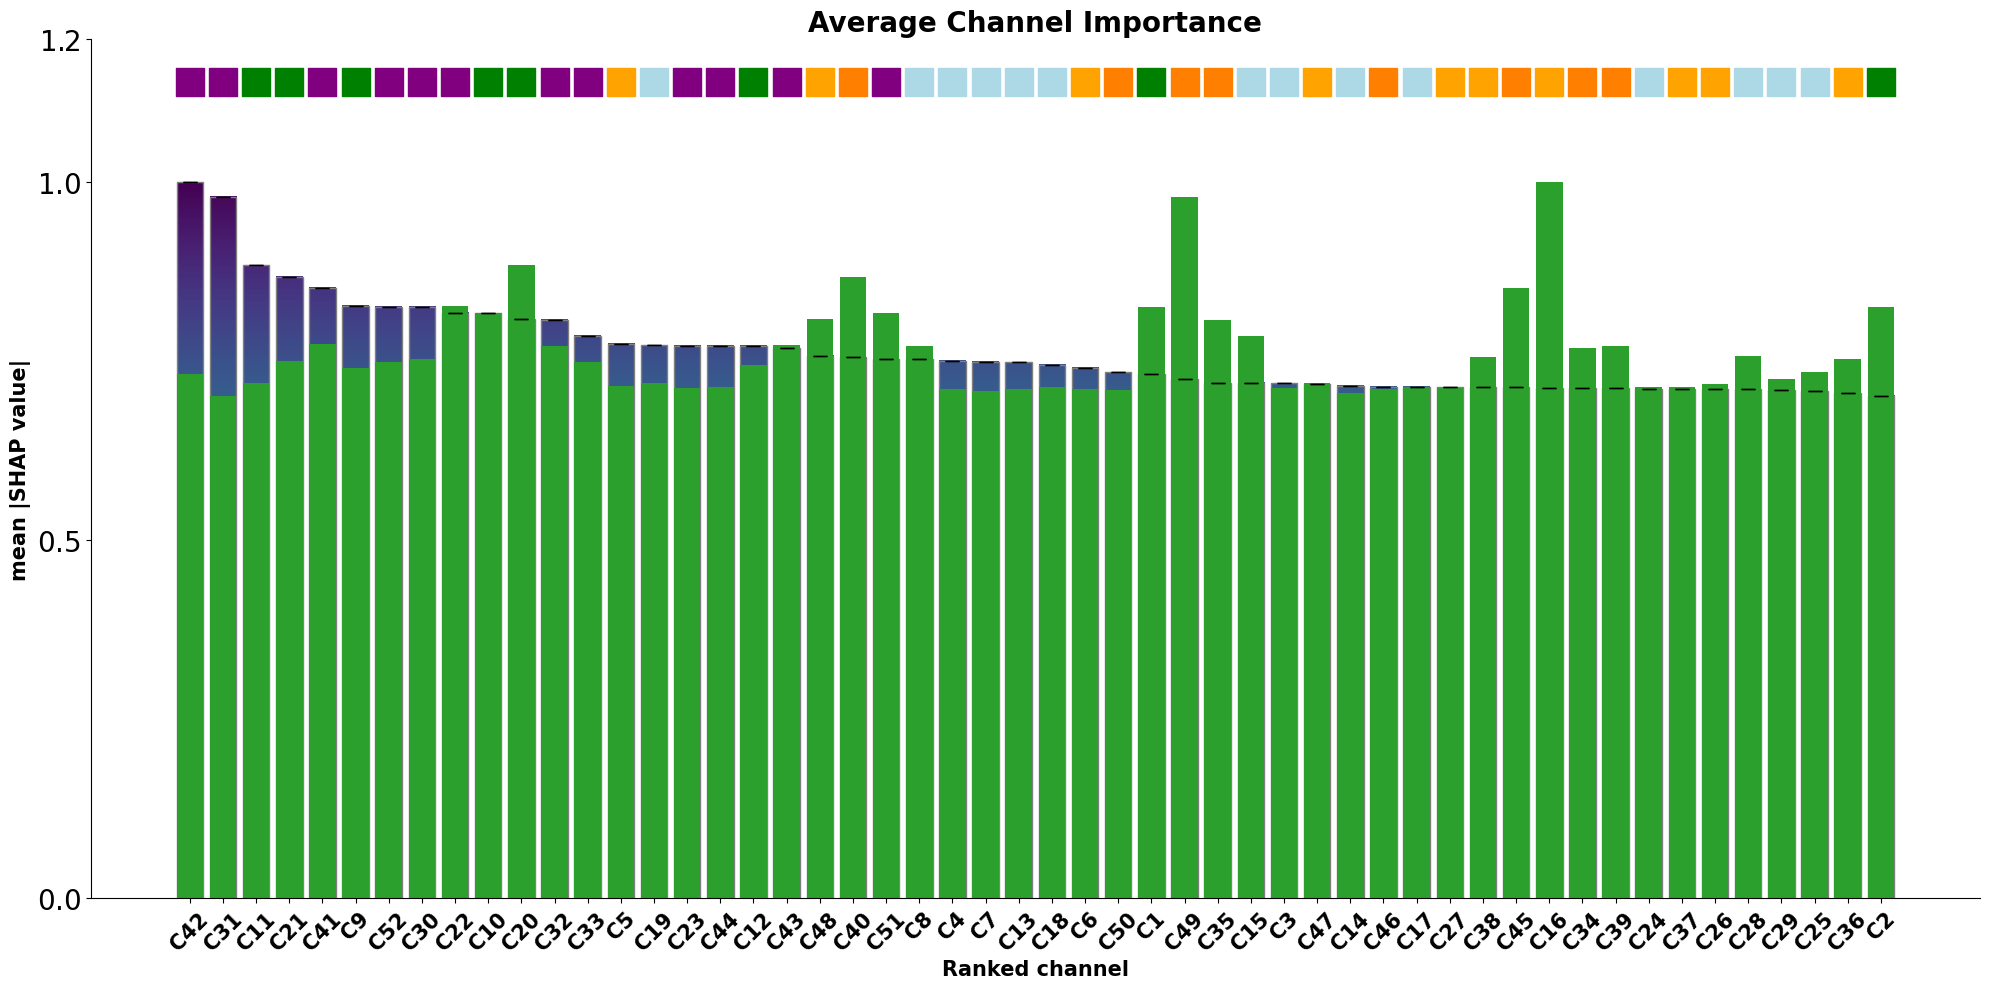

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure()
plt.show()

In [5]:
all_subjects_shap = np.array(all_subjects_shap)
print(all_subjects_shap.shape)
np.save('results/gnn_transformer/prognosis_mix_hb/pretreatment_response/loocv_v1l1_rate_0.01_l2_rate_0.01_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/shap.npy', all_subjects_shap)



(320, 1, 52, 2500, 1, 2)


In [3]:
for v_i in range(5, 14):
    model_para = f'loocv_v{v_i}l1_rate_0.01_l2_rate_0.001_d_model_16_batch_size_64_n_layers_6'
    all_subjects_shap = []
    for subject in range(64):
        for k_fold in range(num_of_k_fold):
            X_train, Y_train, X_val, Y_val, X_test, Y_test, adj_train, adj_val, adj_test = stratified_LOO_nested_CV(data, label, k=k_fold, num_of_k_fold=num_of_k_fold, current_loo=subject, adj=adj)
            X_train = X_train[..., np.newaxis]
            X_test = X_test[..., np.newaxis]
            # checkpoint_path = f'results/gnn_transformer/prognosis/pretreatment_response/loocv_v1l1_rate_0.01_l2_rate_0.01_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/LOO_{subject}/stratified_nested_5_CV_fold-{k_fold}/fold-best-checkpoint'
            checkpoint_path = f'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/{model_para}/LOO_nested_CV/LOO_{subject}/stratified_nested_5_CV_fold-{k_fold}/fold-best-checkpoint'
            classifier.model.load_weights(checkpoint_path)

            
            # NOTE TO DO: why the train metrics are very bad? see sub-0 fold-0/1 
            # train_metrics = compute_data_metrics(classifier, X_train, adj_train, Y_train)
            # val_metrics = compute_data_metrics(classifier, X_val, adj_val, Y_val)
            # print(f"sub - {subject} - fold - {k_fold} - train metrics - {train_metrics}")
            # print(f"sub - {subject} - fold - {k_fold} - val metrics - {val_metrics}")
            
            
            
            explainer = shap.GradientExplainer(classifier.model, [X_train, adj_train])
            shap_values, _ = explainer.shap_values([X_test, adj_test])
            all_subjects_shap.append(shap_values)
    np.save(f'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/{model_para}/LOO_nested_CV/shap.npy', all_subjects_shap)


2024-04-15 12:32:00.616515: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
/home/jy/miniconda3/envs/tf/lib/python3.9/site-packages/keras/src/backend.py:452: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn(


In [22]:
all_shap = np.concatenate((shap_52, shap_last_12), axis=0)

In [20]:
shap_values_v1 = all_shap.copy()
print(shap_values_v1.shape)

shap_values_v1 = np.squeeze(shap_values_v1)
shap_values_v1 = np.mean(shap_values_v1, axis=0)[..., 1]
print(shap_values_v1.shape)


(320, 1, 52, 2500, 1, 2)
(52, 2500)


<BarContainer object of 52 artists>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

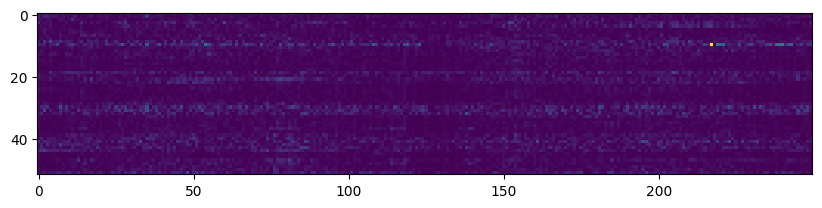

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

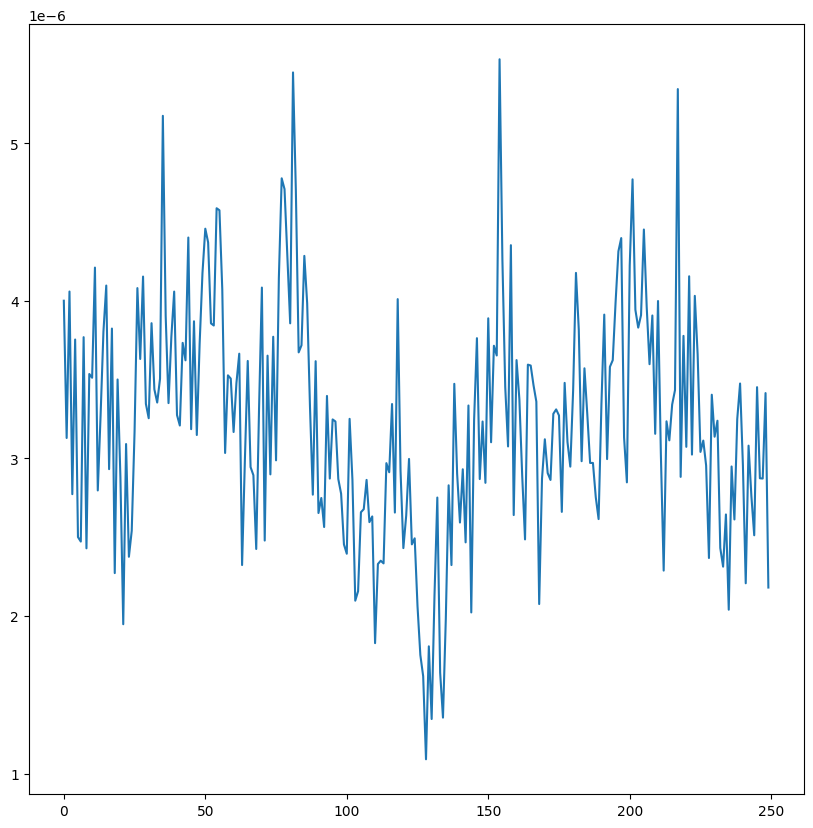

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

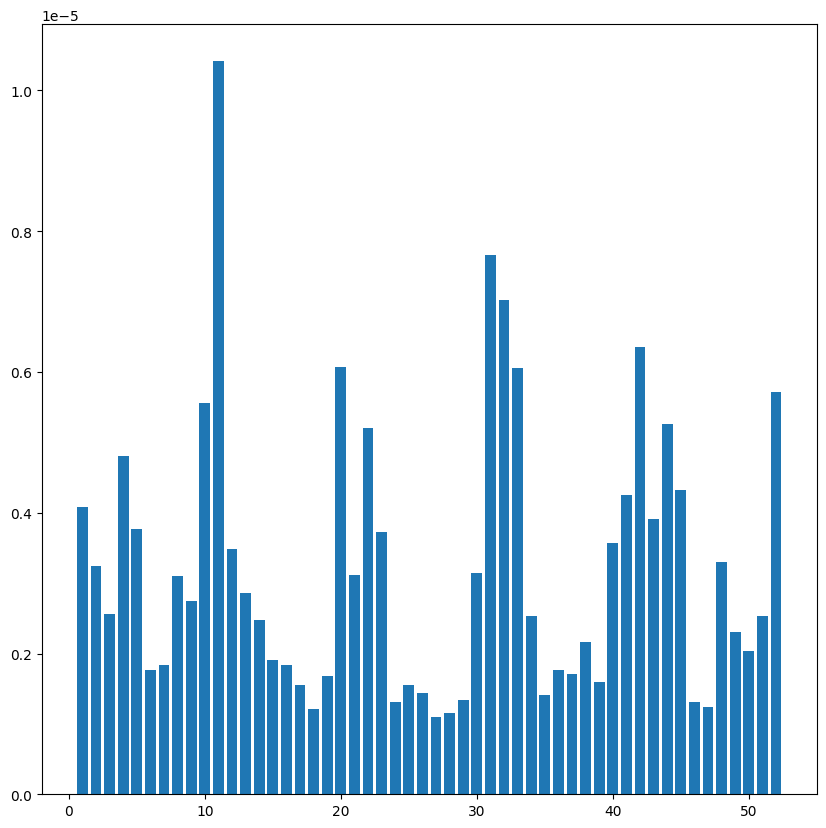

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
val = shap_values_v1.copy()

val = val.reshape(52, 250,10)
val = np.mean(val, axis=2)
val = np.abs(val)

# plot the SHAP values
plt.figure(figsize=(10, 10))
plt.imshow(val, cmap='viridis')


mean_0_val = np.mean(val, axis=0)
plt.figure(figsize=(10, 10))
plt.plot(mean_0_val)



mean_1_val = np.mean(val, axis=1)
plt.figure(figsize=(10, 10))
plt.bar(np.arange(1,53),mean_1_val)

In [17]:
np.array(tmp).shape


shap_52 = np.array(tmp).copy()

In [13]:
np.save('/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning/results/gnn_transformer/prognosis_mix_hb/pretreatment_response/loocv_v2l1_rate_0.01_l2_rate_0.01_d_model_16_batch_size_64_n_layers_6/LOO_nested_CV/shap_0-52.npy', np.array(tmp))